In [63]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import matplotlib.pyplot as plt
import numpy as np
import random as ran

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [64]:
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

def display_mult_flat(start, stop):
    images = x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()

In [65]:
x_train, y_train = TRAIN_SIZE(5500)
x_test, y_test = TEST_SIZE(10000)
LEARNING_RATE = 0.1
TRAIN_STEPS = 1000

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (5500, 784)
y_train Examples Loaded = (5500, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (10000, 784)
y_test Examples Loaded = (10000, 10)


[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


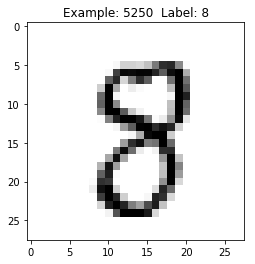

In [66]:
display_digit(ran.randint(0, x_train.shape[0]))

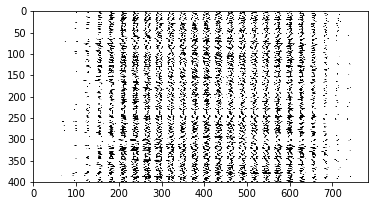

In [67]:
display_mult_flat(0,400)

In [68]:
import tensorflow as tf

In [69]:
sess = tf.Session()

In [70]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [71]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

In [72]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [73]:
training = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [74]:
init = tf.global_variables_initializer()
sess.run(init)

In [75]:
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + '  Loss = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))

Training Step:0  Accuracy =  0.5988  Loss = 1.8110082
Training Step:100  Accuracy =  0.8943  Loss = 0.35560685
Training Step:200  Accuracy =  0.9011  Loss = 0.30053234
Training Step:300  Accuracy =  0.9047  Loss = 0.27229136
Training Step:400  Accuracy =  0.9066  Loss = 0.25334173
Training Step:500  Accuracy =  0.9067  Loss = 0.23912206
Training Step:600  Accuracy =  0.9059  Loss = 0.22776711
Training Step:700  Accuracy =  0.9058  Loss = 0.21832877
Training Step:800  Accuracy =  0.9061  Loss = 0.21026012
Training Step:900  Accuracy =  0.9063  Loss = 0.20321709
Training Step:1000  Accuracy =  0.9056  Loss = 0.19696969
